In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('shape: ', df.shape)
print('size: ', df.size)

shape:  (891, 12)
size:  10692


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:

df['Age'] = df['Age'].fillna((df['Age'].mean()))
df['Embarked'] = df['Embarked'].fillna('S')
df['Cabin'] = df['Cabin'].fillna('Unknown')
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
PassengerId = df['PassengerId']
Survived = df['Survived']
#df1['Survived'] = df1['Survived'].astype(str)
Pclass = df['Pclass']
Name = df['Name']
Sex = df['Sex']
Age = df['Age']
SibSp = df['SibSp']
Parch = df['Parch']
Ticket = df['Ticket']
Fare = df['Fare']
Cabin = df['Cabin']
Embarked = df['Embarked']

In [16]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
df.groupby(['Survived', 'Sex']).agg({'Embarked': 'value_counts'})

Embarked
Survived Sex    Embarked          
0        female S               63
                C                9
                Q                9
         male   S              364
                C               66
                Q               38
1        female S              142
                C               64
                Q               27
         male   S               77
                C               29
                Q                3

In [18]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


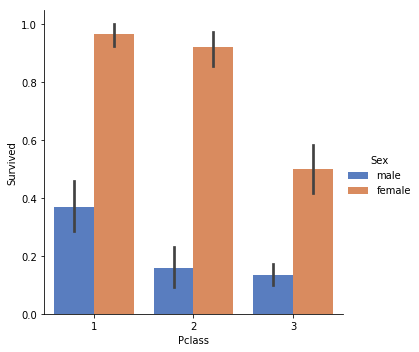

In [19]:
# Set up a factorplot
g = sns.factorplot("Pclass", "Survived", "Sex", data=df, kind="bar", palette="muted", legend=True)
                   
# Show plot
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


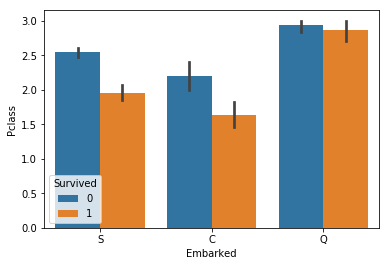

In [20]:
df["Survived"] = df["Survived"].replace("0", "Dead").replace("1", "Alive")
df["Survived"] = df["Survived"].astype(str)
ax = sns.barplot(x="Embarked", y="Pclass", hue="Survived", data=df)


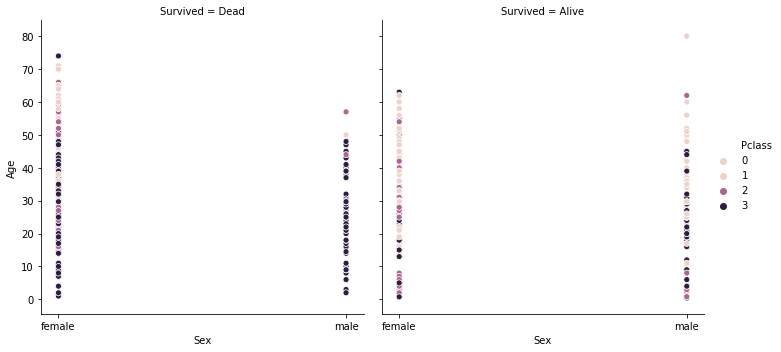

In [22]:
df["Survived"] = df["Survived"].replace("0", "Dead").replace("1", "Alive")
df["Survived"] = df["Survived"].astype(str)
sns.relplot(x="Sex", y="Age", hue="Pclass",
            col="Survived", data=df);

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


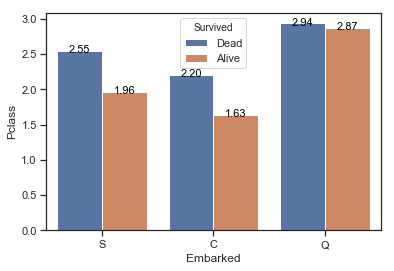

In [106]:
df["Survived"] = df["Survived"].replace("0", "Dead").replace("1", "Alive")
df["Survived"] = df["Survived"].astype(str)
ax = sns.barplot(x="Embarked", y="Pclass", hue="Survived", ci=0, data=df)

for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 1),
                 textcoords='offset points')
plt.savefig('bar1.png')
# ANALISA
#Alive
 ##port dengan jumlah penumpang selamat tertinggi berasal dari Queenstown, sedang terendah berasal dari Cherbourg
#Dead 
 ##port dengan jumlah penumpang meninggal tertinggi berasal dari Queenstown, sedang terendah berasal dari Cherbourg

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


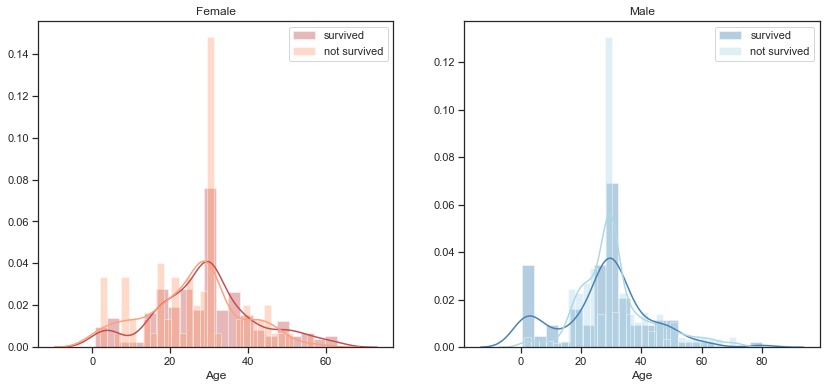

In [105]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14, 6))
female = df[df['Sex']=='female']
male = df[df['Sex']=='male']

# Chart of Female
ax = sns.distplot(female[female['Survived']=='Alive'].Age.dropna(),bins=20, label = survived, ax = axes[0], kde =True, color = 'r')
ax = sns.distplot(female[female['Survived']=='Dead'].Age.dropna(),bins=30, label = not_survived, ax = axes[0], kde =True, color = 'lightsalmon')
ax.legend()
ax.set_title('Female')

# Chart of Male
ax = sns.distplot(male[male['Survived']=='Alive'].Age.dropna(), bins=20, label = survived, ax = axes[1], kde = True, color = 'steelblue')
ax = sns.distplot(male[male['Survived']=='Dead'].Age.dropna(), bins=30, label = not_survived, ax = axes[1], kde = True, color = 'lightblue')
ax.legend()
ax.set_title('Male')
plt.savefig('dist1.png')
# ANALISA
#Female 
 ##Penumpang gender perempuan yang meninggal, mayoritas berasal dari umur dengan range 25-35 tahun
#Male 
 ##Penumpang gender laik-laki yang meninggal, mayoritas berasal dari umur dengan range 25-35 tahun

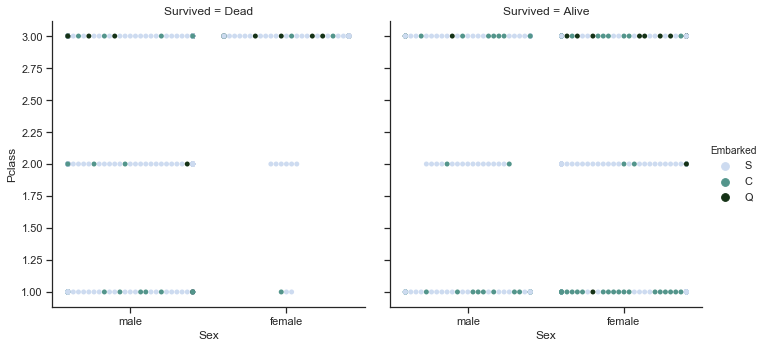

In [104]:
sns.set(style="ticks")
g = sns.catplot(data=df, x='Sex', y='Pclass', hue='Embarked', col='Survived', kind='swarm', palette='ch:10.75', col_wrap=2)
plt.savefig('cat1.png')
# ANALISA
#Dead 
 ##Penumpang yang meninggal berasal dari tiket kelas 3, dengan mayoritas berasal dari port of embarkation Southhampton
#Alive
 ##Penumpang yang selamat mempunyai jumlah yang mirip untuk tiket kelas 1 & 3, dengan port of embarkation masi didonimasi berasal dari Southhampton

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


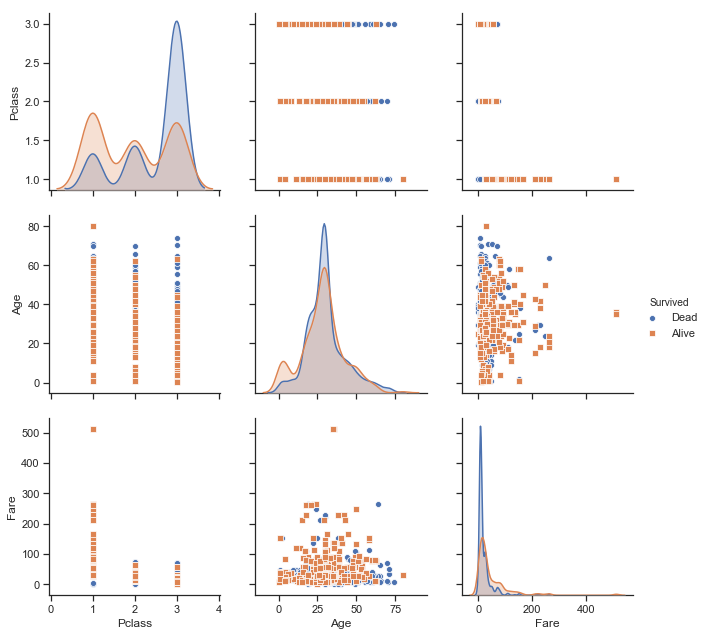

In [103]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, hue="Survived", markers=["o", "s"], vars=["Pclass", "Age", "Fare"], height=3)
plt.savefig('pair1.png')

# ANALISA
#Tiket kelas
 ##Penumpang yang beli tiket kelas 1, mayoritas hidup, terbalik dengan pemegang tiket kelas 3 dimana mayoritas meninggal
#Umur
 ##Penumpang dengan tingkat kematian paling tinggi berasal di range umur 25-40